In [77]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
from networkx import karate_club_graph, to_numpy_matrix, adjacency_matrix
import numpy as np


In [78]:
# Replace this with your networkx graph loading depending on your format !
zkc = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(zkc)

# for key, value  in partition.items():
#     partition[key] = (1 if value >1 else 0 )

#ground_truth = np.array([0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1])
ground_truth = np.array([1,1,2,1,0,0,0,1,3,2,0,1,1,1,3,3,0,1,3,1,3,1,3,3,2,2,3,2,2,3,3,2,3,3])
partition_array = np.array(list(partition.values()))

In [79]:
def get_node_color(input):
    if input==1:
        return "red"
    elif input==2:
        return "green"
    elif input==3:
        return "blue"
    elif input ==4:
        return "yellow"



4.0


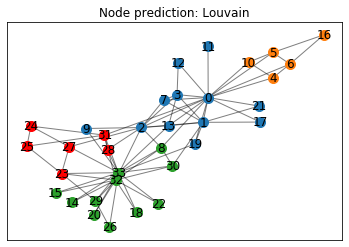

In [80]:
#drawing
size = float(len(set(partition.values())))
print(size)
pos = nx.spring_layout(zkc)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(zkc, pos, list_nodes, node_size = 100,
                                node_color = get_node_color(count / size))


nx.draw_networkx_edges(zkc, pos, alpha=0.5)
nx.draw_networkx_labels(zkc, pos)
plt.title('Node prediction: Louvain')
plt.show()

In [81]:
from sklearn import metrics
print(metrics.adjusted_rand_score(ground_truth, partition_array))
print(metrics.adjusted_mutual_info_score(ground_truth, partition_array))
print(metrics.accuracy_score(ground_truth, partition_array))
print(ground_truth)
print(partition_array)

0.7851362152800906
0.8013958902792218
0.029411764705882353
[1 1 2 1 0 0 0 1 3 2 0 1 1 1 3 3 0 1 3 1 3 1 3 3 2 2 3 2 2 3 3 2 3 3]
[0 0 0 0 1 1 1 0 2 0 1 0 0 0 2 2 1 0 2 0 2 0 2 3 3 3 2 3 3 2 2 3 2 2]
